In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Cleaning and merging 2021 and 2022 files with substance abusers and non abusers

In [ ]:
#Importing the 2021 & 2022 file
data1 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/2021_sa.xlsx")
data2 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/2022_sa.xlsx")

Data Cleaning round 1 - here features that have more than 70% rows as empty are dropped individually.

In [ ]:
data1.shape

(12784, 303)

In [ ]:
data2.shape

(18276, 327)

In [ ]:
#Calculating percentage of missing value for each feature
missing1 = data1.isnull().mean()
threshold = 0.7
features_to_drop1 = missing1[missing1 >= threshold].index.tolist()
#The cleaned dataset
df_cleaned1 = data1.drop(columns=features_to_drop1)

#Calculating percentage of missing value for each feature
missing2 = data2.isnull().mean()
threshold = 0.7
features_to_drop2 = missing2[missing2 >= threshold].index.tolist()
#The cleaned dataset
df_cleaned2 = data2.drop(columns=features_to_drop2)

In [ ]:
df_cleaned1.shape

(12784, 190)

In [ ]:
df_cleaned2.shape

(18276, 189)

Data Cleaning round 2 - Features which are not useful for predicting substance abuse based on existing literature.

1. Variables only in cellphone surveys.
2. Variables about the questionnarie itself.
3. Raw weighting variables that are used in raking.

In [ ]:
df_cleaned1.drop(['DISPCODE','SEQNO','_PSU','CTELENM1','STATERE1','CELPHON1','CTELNUM1','CELLFON5','CSTATE1','QSTVER',
                  'QSTLANG','MSCODE','_STSTR','_STRWT','_RAWRAKE','_WT2RAKE','_LLCPWT2','_LLCPWT'], axis=1, inplace=True)

In [ ]:
df_cleaned2.drop(['Unnamed: 0','DISPCODE','SEQNO','_PSU','CTELNUM1','CELLFON5','CSTATE1','QSTVER','QSTLANG',
                  '_STSTR','_STRWT','_RAWRAKE','_WT2RAKE','_LLCPWT2','_LLCPWT'], axis=1, inplace=True)

In [ ]:
df_cleaned1.shape

(12784, 172)

In [ ]:
df_cleaned2.shape

(18276, 174)

Data Cleaning round 3 - dropping the columns which are not common between the two datasets and merging the data.

In [ ]:
#Renaming similar features with similar column names in 2022 dataset
df_cleaned2.rename(columns = {'COLGSEX1':'COLGSEX', 'LANDSEX1':'LANDSEX', 'CELLSEX1':'CELLSEX', 'CHCSCNC1':'CHCSCNCR','CHCOCNC1':'CHCOCNCR',
                              'HAVARTH4':'HAVARTH5', 'ECIGNOW2':'ECIGNOW1', 'ALCDAY4':'ALCDAY5','PREDIAB2':'PREDIAB1', 'IMFVPLA3':'IMFVPLA2',
                              'USEMRJN4':'USEMRJN3', '_PRACE2':'_PRACE1', '_MRACE2':'_MRACE1', '_RACE1':'_RACE', '_CURECI2':'_CURECI1',
                              'DRNKANY6':'DRNKANY5', '_RFBING6':'_RFBING5', '_DRNKWK2':'_DRNKWK1','_RFDRHV8':'_RFDRHV7','DROCDY4_':'DROCDY3_',
                              '_DRDXAR2':'_DRDXAR3', '_RACEG22':'_RACEG21','_RACEGR4':'_RACEGR3','_RACEPR1':'_RACEPRV','CPDEMO1C':'CPDEMO1B',
                              'PDIABTS1':'PDIABTST'}, inplace = True)

In [ ]:
df_cleaned1.drop(['PVTRESD1','LADULT1','NUMADULT','BPHIGH6','BPMEDS','CHOLCHK3','TOLDHI3','CHOLMED3','ARTHEXER','ARTHEDU','LMTJOIN3','ARTHDIS2',
                  'JOINPAI2','NUMHHOL3','IMFVPLA2','FRUIT2','FRUITJU2','FVGREEN1','FRENCHF1','POTATOE1','VEGETAB2','_CHISPNC','_RFHYPE6','_CHOLCH3',
                  '_RFCHOL3','_LMTACT3','_LMTWRK3','FTJUDA2_','FRUTDA2_','GRENDA1_','FRNCHDA_','POTADA1_','VEGEDA2_','_MISFRT1','_MISVEG1','_FRTRES1',
                  '_VEGRES1','_FRUTSU1','_VEGESU1','_FRTLT1A','_VEGLT1A','_FRT16A','_VEG23A','_FRUITE1','_VEGETE1'], axis=1, inplace=True)



In [ ]:
df_cleaned2.drop(['SLEPTIM1','LASTDEN4','RMVTETH4','HADMAM','HOWLONG','CERVSCRN','CRVCLCNC','CRVCLPAP','CRVCLHPV','HADHYST2','HADSIGM4',
                  'COLNSIGM','COLNTES1','COLNCNCR','LCSFIRST','LCSNUMCG','LCSCTSC1','LCSSCNCR','TETANUS1','HIVTSTD3','HIVRISK5','COVIDPOS',
                  'CIMEMLOS','SOMALE','SOFEMALE','TRNSGNDR','RRCLASS3','RRCOGNT2','RRTREAT','RRATWRK2','RRHCARE4','RRPHYSM2','_EXTETH3',
                  '_ALTETH3','_DENVST3','_RFMAM22','_HADCOLN','_CLNSCP1','_HADSIGM','_SGMSCP1','_SGMS101','_SBONTI1','_CRCREC2','_YRSSMOK',
                  '_PACKDAY','_PACKYRS','_SMOKGRP'], axis=1, inplace=True)

In [ ]:
df_cleaned1.shape

(12784, 127)

In [ ]:
df_cleaned2.shape

(18276, 127)

Creating and defining output variables

In [ ]:
#1. Marijuana abusers
df_cleaned1['MARIJ_ABUSER'] = [0 if ((x == 88) or (x<20)) else 1 for x in df_cleaned1['MARIJAN1']]
#2. E-cigarettes abusers
df_cleaned1['ECIG_ABUSER'] = [1 if (x == 1) else 0 for x in df_cleaned1['ECIGNOW1']]
#3. Tobacco abusers
df_cleaned1['TOBA_ABUSER'] = [1 if (x == 1) else 0 for x in df_cleaned1['USENOW3']]
#4. Alcohol abusers
df_cleaned1['ALCO_ABUSER'] = [0 if ((x == 888) or (x>200 and x<220) or (x>100 and x<105)) else 1 for x in df_cleaned1['ALCDAY5']]
#Categories of abusers
df_cleaned1['LEVEL_ABUSER'] = df_cleaned1['MARIJ_ABUSER']+df_cleaned1['ECIG_ABUSER']+df_cleaned1['TOBA_ABUSER']+df_cleaned1['ALCO_ABUSER']
#Creating the target column whether the participant is a substance abuser or not
df_cleaned1['TARGET_ABUSER'] = [0 if (x == 0) else 1 for x in df_cleaned1['LEVEL_ABUSER']]

In [ ]:
#1. Marijuana abusers
df_cleaned2['MARIJ_ABUSER'] = [0 if ((x == 88) or (x<20)) else 1 for x in df_cleaned2['MARIJAN1']]
#2. E-cigarettes abusers
df_cleaned2['ECIG_ABUSER'] = [1 if (x == 2) else 0 for x in df_cleaned2['ECIGNOW1']]
#3. Tobacco abusers
df_cleaned2['TOBA_ABUSER'] = [1 if (x == 1) else 0 for x in df_cleaned2['USENOW3']]
#4. Alcohol abusers
df_cleaned2['ALCO_ABUSER'] = [0 if ((x == 888) or (x>200 and x<220) or (x>100 and x<105)) else 1 for x in df_cleaned2['ALCDAY5']]
#Categories of abusers
df_cleaned2['LEVEL_ABUSER'] = df_cleaned2['MARIJ_ABUSER']+df_cleaned2['ECIG_ABUSER']+df_cleaned2['TOBA_ABUSER']+df_cleaned2['ALCO_ABUSER']
#Creating the target column whether the participant is a substance abuser or not
df_cleaned2['TARGET_ABUSER'] = [0 if (x == 0) else 1 for x in df_cleaned2['LEVEL_ABUSER']]

In [ ]:
merged_df = pd.concat([df_cleaned1, df_cleaned2], axis=0)

In [ ]:
merged_df.shape

(31060, 133)

In [ ]:
merged_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 31060 entries, 0 to 18275
Data columns (total 133 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    _STATE         31060 non-null  int64  
 1    FMONTH         31060 non-null  int64  
 2    IDATE          31060 non-null  int64  
 3    IMONTH         31060 non-null  int64  
 4    IDAY           31060 non-null  int64  
 5    IYEAR          31060 non-null  int64  
 6    SAFETIME       20456 non-null  float64
 7    CADULT1        20456 non-null  float64
 8    CELLSEX        20456 non-null  float64
 9    PVTRESD3       20456 non-null  float64
 10   LANDLINE       20456 non-null  float64
 11   HHADULT        20456 non-null  float64
 12   SEXVAR         31060 non-null  int64  
 13   GENHLTH        31060 non-null  int64  
 14   PHYSHLTH       31060 non-null  int64  
 15   MENTHLTH       31060 non-null  int64  
 16   POORHLTH       17168 non-null  float64
 17   PRIMINSR       31060 non-null  int

In [ ]:
df = merged_df

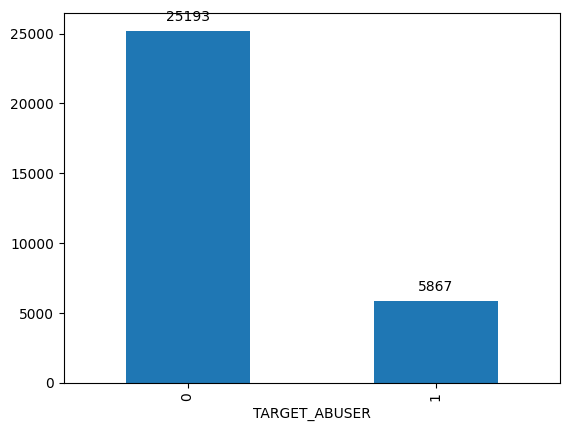

In [ ]:
#Checking the class balance for the output
bx = df['TARGET_ABUSER'].value_counts().plot(kind='bar')

# Add count values on top of the bars
for p in bx.patches:
                bx.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


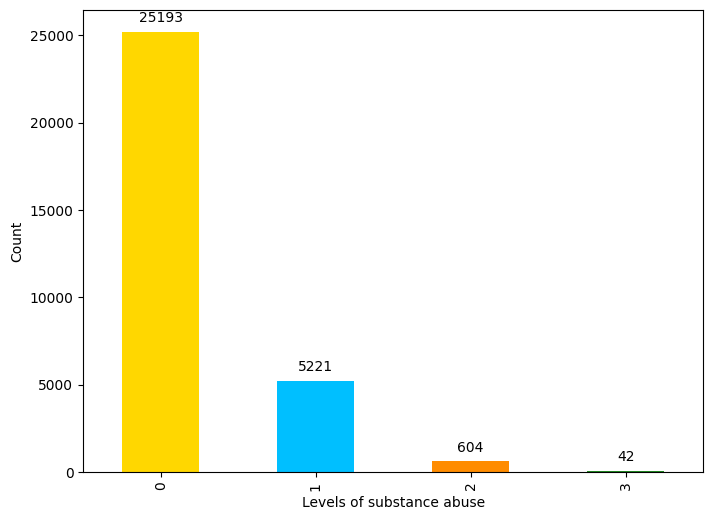

In [ ]:
#Checking the class balance for the output
plt.figure(figsize=(8, 6))
bx = df['LEVEL_ABUSER'].value_counts().plot(kind='bar', color=['gold','deepskyblue','darkorange','forestgreen','red','turquoise','black'],
                                     xlabel = 'Levels of substance abuse', ylabel = 'Count')

# Add count values on top of the bars
for p in bx.patches:
                bx.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [ ]:
# write the cleaned data frame to a new Excel file
df.to_excel("/content/drive/MyDrive/Capstone_Project/Backup/cleaned_sa_2021_2022.xlsx", index=False, header = True)